In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_excel('Contract_Data.xlsx')

In [3]:
df.head()

,Agency Name,Parent Contract ID,Contract ID,Publish Date,Start Date,End Date,Value,Amendment Date,Amendment Start Date,Amendments Value,...,Contact Name,Contact Phone,Branch,Division,Office Postcode,Applicable Publish Date,Applicable FY Year,Applicable Value,Duration Years,Applicable Start Date
0,Department of Defence,NaN,CN3620990,2019-08-20,2019-05-01,2019-05-31,16163.40,NaT,NaT,NaN,...,Army Forces Command,0,Army Forces Command,ARMY HEADQUARTERS,2021,2019-08-20,2020,16163.40,0.222222,2019-05-01
1,Australian Bureau of Statistics,CN3602517,CN3602517-A1,2019-06-21,2018-07-01,2023-06-30,1964000.00,2020-05-25,2020-05-25,648000.00,...,"Director, procurement",NaN,NaN,NaN,2617,2020-05-25,2020,648000.00,3.097222,2020-05-25
2,Services Australia,NaN,CN3671573,2020-04-07,2020-03-19,2020-03-27,155997.60,NaT,NaT,NaN,...,PURCHASING HELPDESK,1800 906 144,DHS Branch,DHS Division,2900,2020-04-07,2020,155997.60,0.027778,2020-03-19
3,Department of Health,NaN,CN3648860,2019-12-19,2020-01-02,2020-06-30,169542.12,NaT,NaT,NaN,...,BMU,02 6289 4977,NaN,Cancer Hearing and Program Support DIV,2606,2019-12-19,2020,169542.12,0.530556,2020-01-02
4,Administrative Appeals Tribunal,CN3591066,CN3591066-A1,2019-05-13,2019-02-27,2019-07-31,13263.55,2019-07-25,2019-06-01,13263.55,...,PROCUREMENT OFFICER,(03)9454 6100,Administrative Appeals Tribunal Administrative...,AAT Administrative Appeals Tribunal,4000,2019-07-25,2020,13263.55,0.016667,2019-06-01


In [4]:
df.columns

Index(['Agency Name', 'Parent Contract ID', 'Contract ID', 'Publish Date',
       'Start Date', 'End Date', 'Value', 'Amendment Date',
       'Amendment Start Date', 'Amendments Value', 'Description',
       'Agency Ref ID', 'UNSPSC Code', 'UNSPSC Title', 'Procurement Method',
       'ATM ID', 'SON ID', 'Panel Arrangement',
       'Confidentiality Contract Flag', 'Confidentiality Contract Reason',
       'Confidentiality Outputs Flag', 'Confidentiality Outputs Reason',
       'Consultancy Flag', 'Consultancy Reason', 'Amendment Reason',
       'Supplier Name', 'Supplier Address', 'Supplier Suburb',
       'Supplier Postcode', 'Supplier State', 'Supplier Country',
       'Supplier ABN Exempt', 'Supplier ABN', 'Contact Name', 'Contact Phone',
       'Branch', 'Division', 'Office Postcode', 'Applicable Publish Date',
       'Applicable FY Year', 'Applicable Value', 'Duration Years',
       'Applicable Start Date'],
      dtype='object')

In [5]:
# Listing unrequired column
rm_col = ['Parent Contract ID','Contract ID','Amendment Date','Description','Agency Ref ID', 'UNSPSC Code','ATM ID', 'SON ID', 'Panel Arrangement','Confidentiality Contract Flag', 'Confidentiality Contract Reason',
       'Confidentiality Outputs Flag', 'Confidentiality Outputs Reason',
       'Consultancy Flag', 'Consultancy Reason', 'Amendment Reason',
       'Supplier ABN Exempt', 'Supplier ABN', 'Contact Name', 'Contact Phone',
       'Branch', 'Division', 'Office Postcode','Publish Date',
        'Amendment Date',
       ]

In [6]:
# Removing unrequired column
data_cleaned = df.drop(rm_col,axis=1)

In [7]:
data_cleaned.head()

,Agency Name,Start Date,End Date,Value,Amendment Start Date,Amendments Value,UNSPSC Title,Procurement Method,Supplier Name,Supplier Address,Supplier Suburb,Supplier Postcode,Supplier State,Supplier Country,Applicable Publish Date,Applicable FY Year,Applicable Value,Duration Years,Applicable Start Date
0,Department of Defence,2019-05-01,2019-05-31,16163.40,NaT,NaN,Fitness equipment,Limited tender,BLP TRAINING & SERVICES PTY LTD,NaN,BEENLEIGH,4207,QLD,AUSTRALIA,2019-08-20,2020,16163.40,0.222222,2019-05-01
1,Australian Bureau of Statistics,2018-07-01,2023-06-30,1964000.00,2020-05-25,648000.00,Software maintenance and support,Open tender,IBM Australia Limited,NaN,Pennant Hills,1715,NSW,AUSTRALIA,2020-05-25,2020,648000.00,3.097222,2020-05-25
2,Services Australia,2020-03-19,2020-03-27,155997.60,NaT,NaN,Education and Training Services,Open tender,Benestar Group Pty Ltd,PO Box Q1436,QVB Post Office Sydney,1230,NSW,Australia,2020-04-07,2020,155997.60,0.027778,2020-03-19
3,Department of Health,2020-01-02,2020-06-30,169542.12,NaT,NaN,Personnel recruitment,Open tender,PEOPLEBANK AUSTRALIA LTD,NaN,NORTH SYDNEY,2060,NSW,Australia,2019-12-19,2020,169542.12,0.530556,2020-01-02
4,Administrative Appeals Tribunal,2019-02-27,2019-07-31,13263.55,2019-06-01,13263.55,Temporary personnel services,Limited tender,LAUNCH RECRUITMENT PTY LTD,LEVEL 10 1 CASTLEREAGH STREET,SYDNEY,2000,NSW,AUSTRALIA,2019-07-25,2020,13263.55,0.016667,2019-06-01


### Scenario 1

In [8]:
# imputing Applicable value based on Amendments
data_cleaned['Applicable Value'] = np.where(data_cleaned['Amendments Value'].isnull(), data_cleaned['Value'], data_cleaned['Amendments Value']) 

In [9]:
# Calulating project value per year

data_cleaned['Value_year'] = np.where(data_cleaned['Duration Years'] > 0, data_cleaned['Applicable Value'] / data_cleaned['Duration Years'], 0) 

In [10]:
data_cleaned.sort_values(by= 'Value_year', ascending=False)

,Agency Name,Start Date,End Date,Value,Amendment Start Date,Amendments Value,UNSPSC Title,Procurement Method,Supplier Name,Supplier Address,Supplier Suburb,Supplier Postcode,Supplier State,Supplier Country,Applicable Publish Date,Applicable FY Year,Applicable Value,Duration Years,Applicable Start Date,Value_year
34928,Department of Defence,2017-06-01,2020-06-12,1.469391e+08,2020-05-15,21768032.00,Components for information technology or broad...,Prequalified tender,VERIZON AUSTRALIA PTY LTD,NaN,ST LEONARDS,2065,NSW,AUSTRALIA,2020-06-11,2020,2.176803e+07,0.002778,2020-05-15,7.836492e+09
66173,"Department of Infrastructure, Transport, Regio...",2020-04-16,2020-06-11,1.282549e+08,NaT,NaN,Passenger air transportation,Limited tender,Qantas Airways Limited,NaN,Mascot,2020,NSW,AUSTRALIA,2020-05-28,2020,1.282549e+08,0.036111,2020-04-16,3.551674e+09
30461,Department of Defence,2017-08-11,2020-05-15,6.227127e+07,2020-05-13,7731550.40,Aerospace systems and components and equipment,Prequalified tender,FMS ACCOUNT RESERVE BANK OF AUSTRALIA,NaN,NEW YORK,10000,Outside Australia,UNITED STATES,2020-05-14,2020,7.731550e+06,0.002778,2020-05-13,2.783358e+09
10736,Australian Taxation Office,2018-04-01,2019-06-30,6.413392e+07,2019-07-01,27820570.00,Building construction and support and maintena...,Open tender,BROADSPECTRUM PROPERTY PTY LTD (for POE Costs ...,NaN,FORREST (EFTE),2603,ACT,AUSTRALIA,2019-07-04,2020,2.782057e+07,0.011111,2019-07-01,2.503851e+09
49967,Department of Defence,2019-07-10,2019-09-30,8.796970e+07,2019-10-11,83198695.01,Marine craft systems and subassemblies,Limited tender,THALES AUSTRALIA LIMITED,NaN,SYDNEY OLYMPIC PARK,2127,NSW,AUSTRALIA,2019-10-15,2020,8.319870e+07,0.041667,2019-10-11,1.996769e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16941,"Department of Agriculture, Water and the Envir...",2020-03-13,2020-03-30,2.877336e+04,NaT,NaN,General building construction,Limited tender,AFFINITY CONSTRUCTIONS (AUST) PTY LTD,NaN,FYSHWICK,2609,ACT,Australia,2020-03-31,2020,2.877336e+04,0.000000,2020-03-13,0.000000e+00
67649,Department of the Prime Minister and Cabinet,2019-07-08,2019-08-08,3.893859e+04,NaT,NaN,Project management,Limited tender,EVOLVE FM PTY LTD,NaN,SYDNEY,2019,NSW,AUSTRALIA,2019-08-08,2020,3.893859e+04,0.000000,2019-07-08,0.000000e+00
403,Administrative Appeals Tribunal,2019-06-19,2019-07-01,1.262903e+04,NaT,NaN,Software,Open tender,DATA #3 LIMITED,PO BOX 551,INDOOROOPILLY,4068,QLD,Australia,2019-07-01,2020,1.262903e+04,0.000000,2019-06-19,0.000000e+00
43607,Department of Defence,2020-03-09,2020-06-16,1.767488e+04,NaT,NaN,Food and Beverage Products,Open tender,BIDFOOD AUSTRALIA LIMITED,NaN,PENDLE HILL,2145,NSW,AUSTRALIA,2020-06-16,2020,1.767488e+04,0.000000,2020-03-09,0.000000e+00


In [11]:
# Getting list of Contract with Higher Amendment value than original value

data_cleaned['value_difference'] = np.where(data_cleaned['Amendments Value'].isnull(),0,data_cleaned['Amendments Value'] - data_cleaned['Value'])
data_cleaned[data_cleaned['value_difference']>0].sort_values(by = 'value_difference',ascending=False)

,Agency Name,Start Date,End Date,Value,Amendment Start Date,Amendments Value,UNSPSC Title,Procurement Method,Supplier Name,Supplier Address,...,Supplier Postcode,Supplier State,Supplier Country,Applicable Publish Date,Applicable FY Year,Applicable Value,Duration Years,Applicable Start Date,Value_year,value_difference
74509,Grains Research and Development Corporation,2019-05-15,2023-06-30,2227500.00,2019-05-15,20047500.00,Crop production and management and protection,Open tender,DPIRD,Locked Bag 4,...,6102,WA,AUSTRALIA,2020-01-30,2020,20047500.00,3.416667,2019-05-15,5.867561e+06,17820000.00
18348,"Department of Agriculture, Water and the Envir...",2018-03-05,2021-06-30,249571.00,2019-11-13,10778600.00,Temporary personnel services,Open tender,FIRST PEOPLE RECRUITMENT SOLUTIONS PTY LTD,NaN,...,2600,ACT,AUSTRALIA,2019-11-14,2020,10778600.00,1.627778,2019-11-13,6.621666e+06,10529029.00
56348,Department of Foreign Affairs and Trade - Aust...,2019-04-05,2020-01-31,1250000.00,2019-12-20,3750000.00,Management advisory services,Open tender,ACCELERATING ASIA PTE LTD,"160 ROBINSON ROAD, #10-05, SBF CENTER,",...,NaN,Outside Australia,SINGAPORE,2019-12-23,2020,3750000.00,0.105556,2019-12-20,3.552632e+07,2500000.00
14036,Bureau of Meteorology,2018-10-22,2021-06-30,449345.60,2019-07-01,2683296.00,Temporary personnel services,Open tender,DFP Recruitment Services Pty Ltd,NaN,...,3000,VIC,AUSTRALIA,2019-07-19,2020,2683296.00,1.947222,2019-07-01,1.378012e+06,2233950.40
56076,Department of Foreign Affairs and Trade - Aust...,2017-11-13,2020-04-30,3465844.36,2020-04-17,3812428.80,Building construction and support and maintena...,Open tender,REEVES INTERNATIONAL PTY LTD,"Level 1, 473-479 Victoria Street,",...,3003,VIC,AUSTRALIA,2020-04-17,2020,3812428.80,0.036111,2020-04-17,1.055750e+08,346584.44
77010,Office of the Commonwealth Ombudsman,2019-05-01,2019-08-31,32000.00,2019-05-01,288000.00,Accounting services,Open tender,McGrath Nicol,GPO Box 9986,...,2001,NSW,AUSTRALIA,2019-10-04,2020,288000.00,0.094444,2019-05-01,3.049412e+06,256000.00
73533,Future Fund Management Agency,2019-09-09,2020-03-02,182680.33,2020-03-02,410432.63,Temporary personnel services,Limited tender,Talent International (VIC) Pty Ltd,NaN,...,3000,VIC,AUSTRALIA,2020-03-11,2020,410432.63,0.025000,2020-03-02,1.641731e+07,227752.30
16640,"Department of Agriculture, Water and the Envir...",2019-07-01,2020-06-30,79500.00,2020-03-05,300000.00,Security or access control systems,Open tender,FREDON SECURITY PTY LIMITED,UNIT 1/119-121 GLADSTONE STREET,...,2609,ACT,AUSTRALIA,2020-03-17,2020,300000.00,0.286111,2020-03-05,1.048544e+06,220500.00
75629,National Capital Authority,2018-04-04,2019-06-30,58169.05,2019-10-17,225169.05,Management information systems MIS,Limited tender,Priava Management Pty Ltd,NaN,...,2150,NSW,AUSTRALIA,2019-10-22,2020,225169.05,0.311111,2019-10-17,7.237577e+05,167000.00
17944,"Department of Agriculture, Water and the Envir...",2019-09-12,2020-06-30,183508.00,2019-09-12,296436.00,Temporary personnel services,Open tender,PAXUS AUSTRALIA PTY LIMITED,NaN,...,3008,VIC,Australia,2020-03-11,2020,296436.00,0.302778,2019-09-12,9.790547e+05,112928.00


### Scenario 2

In [12]:
data_cleaned['Supplier Country'] = data_cleaned['Supplier Country'].str.upper()
data_cleaned['Supplier Country'].value_counts().head(5)

AUSTRALIA         77764
UNITED STATES      1516
UNITED KINGDOM      415
CANADA              175
NEW ZEALAND         142
Name: Supplier Country, dtype: int64

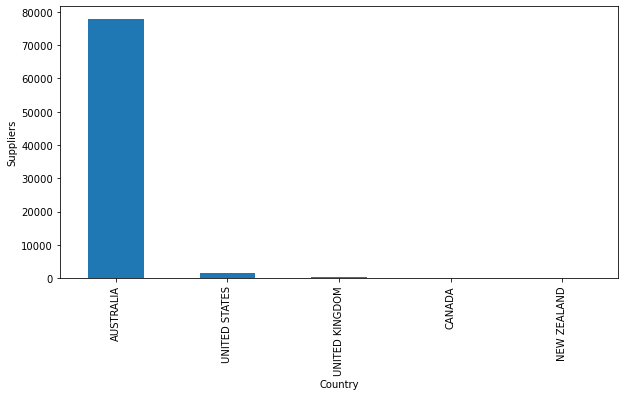

In [13]:
ax = data_cleaned['Supplier Country'].value_counts().head(5).plot.bar(x = 'Supplier Country',figsize=(10,5),xlabel ='Country', ylabel = 'Suppliers')


<AxesSubplot:title={'center':'Top 20 Region with suppliers(with CBD region) '}, xlabel='POSTCODE', ylabel='Suppliers'>

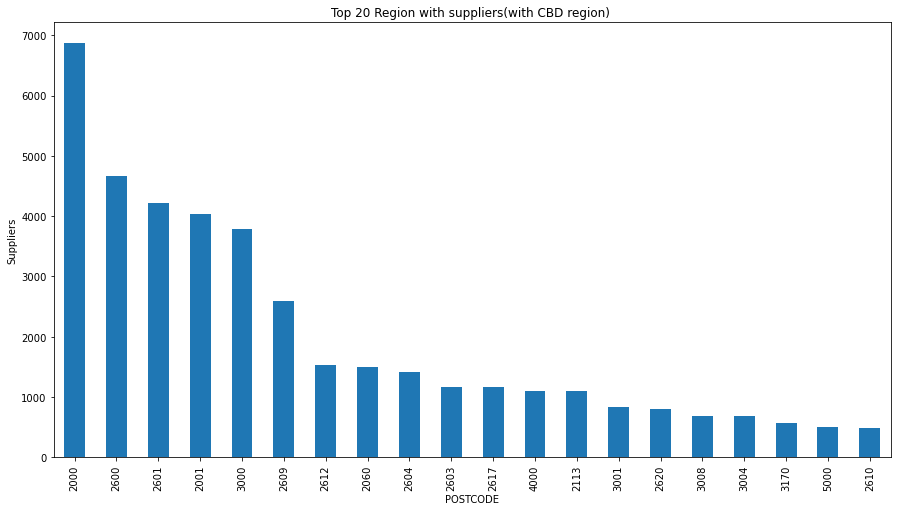

In [14]:
data_cleaned['Supplier Postcode'].value_counts().sort_values(ascending=False).head(20).plot.bar(x = 'Supplier Postcode',figsize=(15,8),xlabel ='POSTCODE', ylabel = 'Suppliers', title = 'Top 20 Region with suppliers(with CBD region) ')

In [15]:
 CBD_region = [2600,2601,2000,2001,2007,2009,4000,4001, 5000, 5001] + [x for x in range(3000,3007)]

<AxesSubplot:title={'center':'Top 20 Region(Excluding CBD) '}, xlabel='POSTCODE', ylabel='Suppliers'>

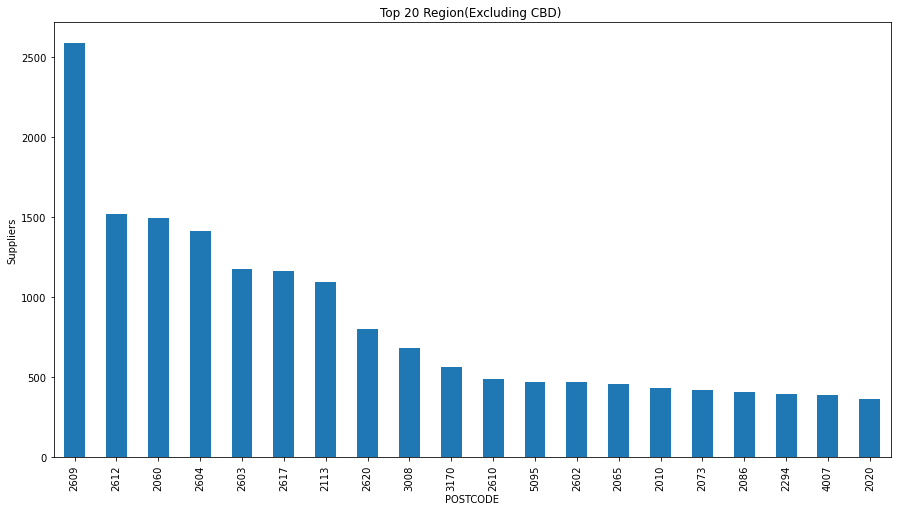

In [16]:
data_cleaned['Supplier Postcode'].value_counts().sort_values(ascending=False).drop(CBD_region).head(20).plot.bar(x = 'Supplier Postcode',figsize=(15,8),xlabel ='POSTCODE', ylabel = 'Suppliers', title = 'Top 20 Region(Excluding CBD) ')

### Scenario 3

### Aim : To predict the type of procurement Method of a tender 

In [30]:
data_cleaned.isna().sum()

Agency Name                    0
Start Date                     0
End Date                       0
Value                          0
Amendment Start Date       65184
Amendments Value           65246
UNSPSC Title                   0
Procurement Method             0
Supplier Name                  0
Supplier Address           50094
Supplier Suburb               47
Supplier Postcode            318
Supplier State                 0
Supplier Country               0
Applicable Publish Date        0
Applicable FY Year             0
Applicable Value               0
Duration Years                 0
Applicable Start Date          0
Value_year                     0
value_difference               0
dtype: int64

For our case we would try to use only Agency Name and UNSPSC Title to predict the procurement method type.

In [18]:
Data = data_cleaned[['Agency Name','Procurement Method','UNSPSC Title']]

In [31]:
Data.head()

,Agency Name,Procurement Method,UNSPSC Title
0,Department of Defence,Limited tender,Fitness equipment
1,Australian Bureau of Statistics,Open tender,Software maintenance and support
2,Services Australia,Open tender,Education and Training Services
3,Department of Health,Open tender,Personnel recruitment
4,Administrative Appeals Tribunal,Limited tender,Temporary personnel services


In [20]:
len(Data['UNSPSC Title'].unique())

525

In [21]:
# Encoding Procurement Tender
# p_dict={'Limited tender':0, 'Open tender':1, 'Prequalified tender':2}
# Data=Data.replace({'Procurement Method':p_dict})

# one-hot Encoding 
Agency_dummy = pd.get_dummies(Data['Agency Name'])
Service_dummy = pd.get_dummies(Data['UNSPSC Title'])
Procurement_dummy = pd.get_dummies(Data['Procurement Method'])

In [22]:
# Seperating input and output variable
y = Procurement_dummy
X = pd.concat([Agency_dummy,Service_dummy],axis=1)

In [23]:
X.head()


,Administrative Appeals Tribunal,Aged Care Quality and Safety Commission,Asbestos Safety and Eradication Agency,Attorney-General's Department,Austrade,Australian Building and Construction Commission,Australian Bureau of Statistics,Australian Centre for International Agricultural Research,Australian Commission for Law Enforcement Integrity,Australian Communications and Media Authority,...,Water treatment services,Watersports equipment,Waxes and oils,Well drilling and operation equipment,Wildlife and flora,Window treatments,Wood and paper industries,Work related organisations,Workstations and office packages,Written translation services
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Splittig Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [25]:
# Training Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt.predict(X_test)

In [28]:
y_pred

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Actual = np.array(y_test).argmax(axis=1)
y_pred = np.array(y_pred).argmax(axis=1)
print('Confusion Matrix')
print(confusion_matrix(Actual, y_pred))

print('Accuracy')
print(accuracy_score(Actual, y_pred))

Confusion Matrix
[[8291 1441  154]
 [1775 7131  302]
 [ 515  114  571]]
Accuracy
0.7880654380605105
